### Импорт данных

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [2]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

# Импорт моделей и метрик
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from catboost import CatBoostClassifier

# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

# Настройки для графиков
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 150
sns.set_style('whitegrid')


In [5]:
# import gdown

# # Ссылка на файл в Google Drive
# # Преобразуем ссылку в формат, пригодный для скачивания
# url = 'https://drive.google.com/uc?id=1SDBuPOtEYY5vqtbCrkpsgoGjucNVYFWr'

# # Имя файла для сохранения
# output = 'hotel_bookings.csv'

# # Скачивание файла
# gdown.download(url, output, quiet=False)


### Информация о датасете

In [4]:
# Загрузка датасета в DataFrame
df = pd.read_csv('Hotel Reservations.csv')
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# Получение общей информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# Проверка на пропущенные значения
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Пропусков в данных нет

### Изучение числовых признаков

In [8]:
# Статистическое описание числовых признаков
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Изучение категориальных признаков

In [9]:
# Список категориальных столбцов
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Категориальные признаки:", categorical_cols)

# Вывод уникальных значений в категориальных столбцах
for col in categorical_cols:
    print(f"\nУникальные значения в {col}:")
    print(df[col].unique())


Категориальные признаки: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

Уникальные значения в Booking_ID:
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']

Уникальные значения в type_of_meal_plan:
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Уникальные значения в room_type_reserved:
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Уникальные значения в market_segment_type:
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Уникальные значения в booking_status:
['Not_Canceled' 'Canceled']


### Визуализация числовых признаков

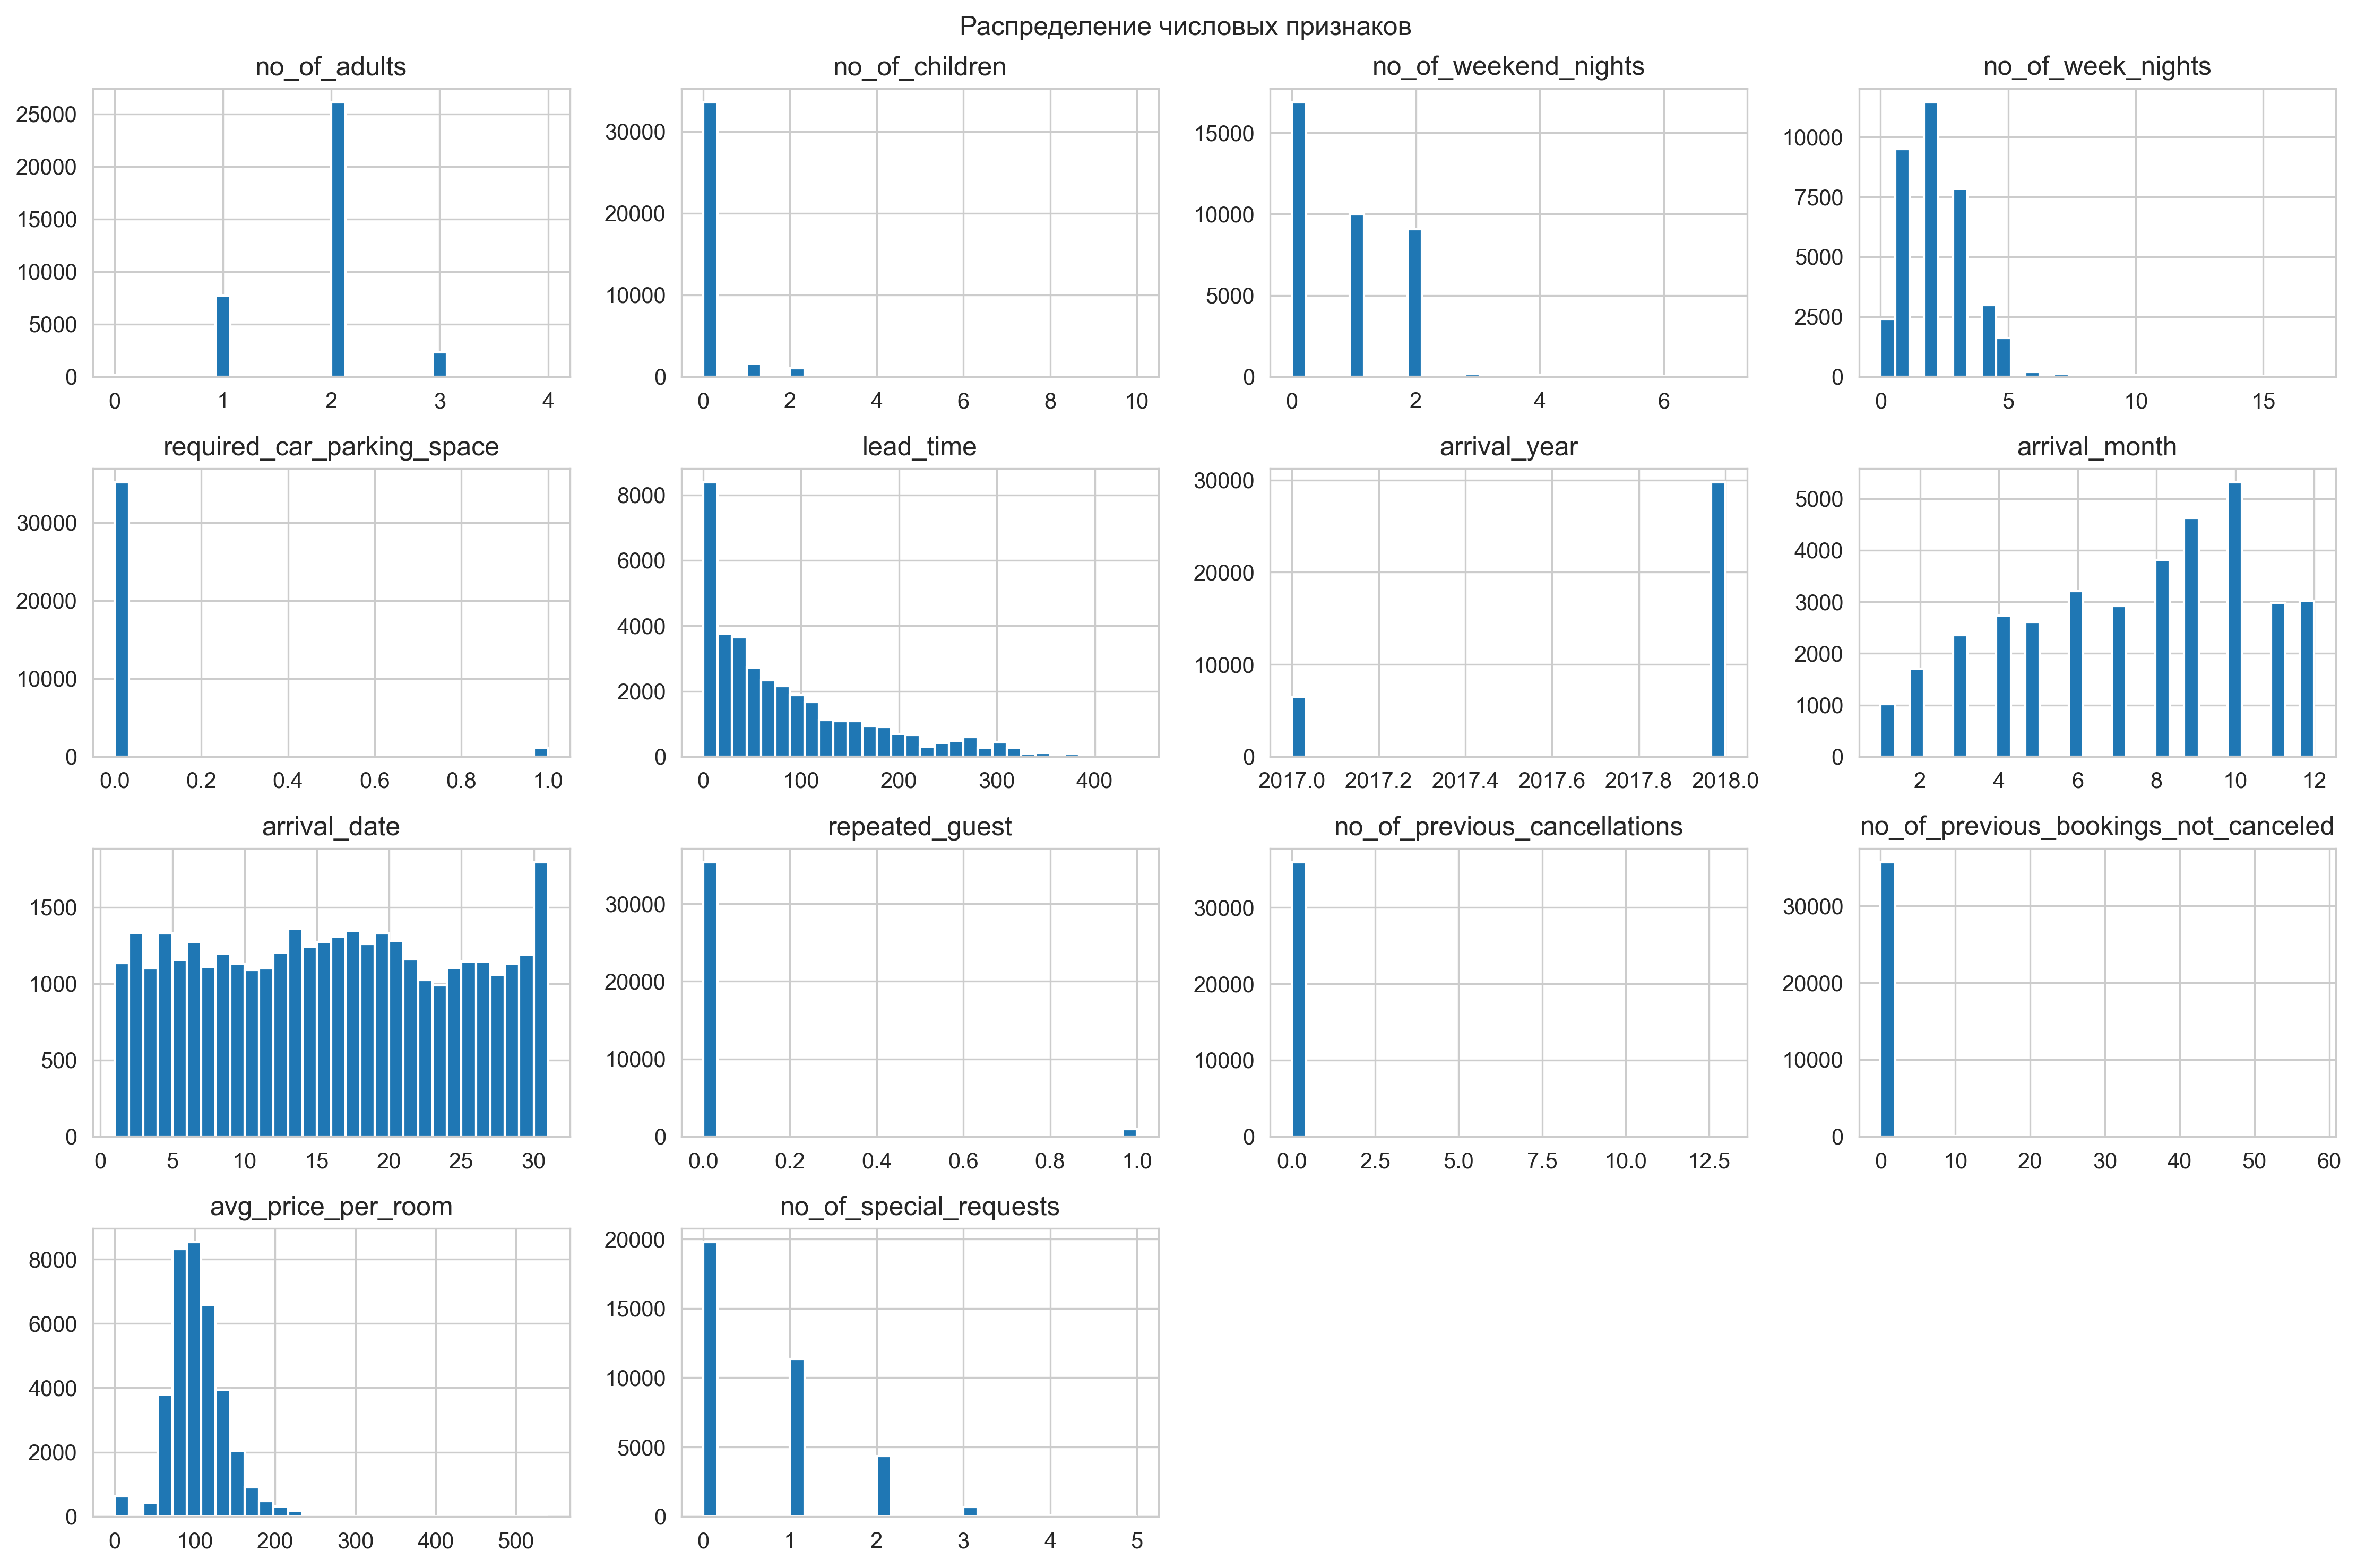

In [10]:
# Построение гистограмм для числовых признаков
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Распределение числовых признаков")
plt.tight_layout()
plt.show()

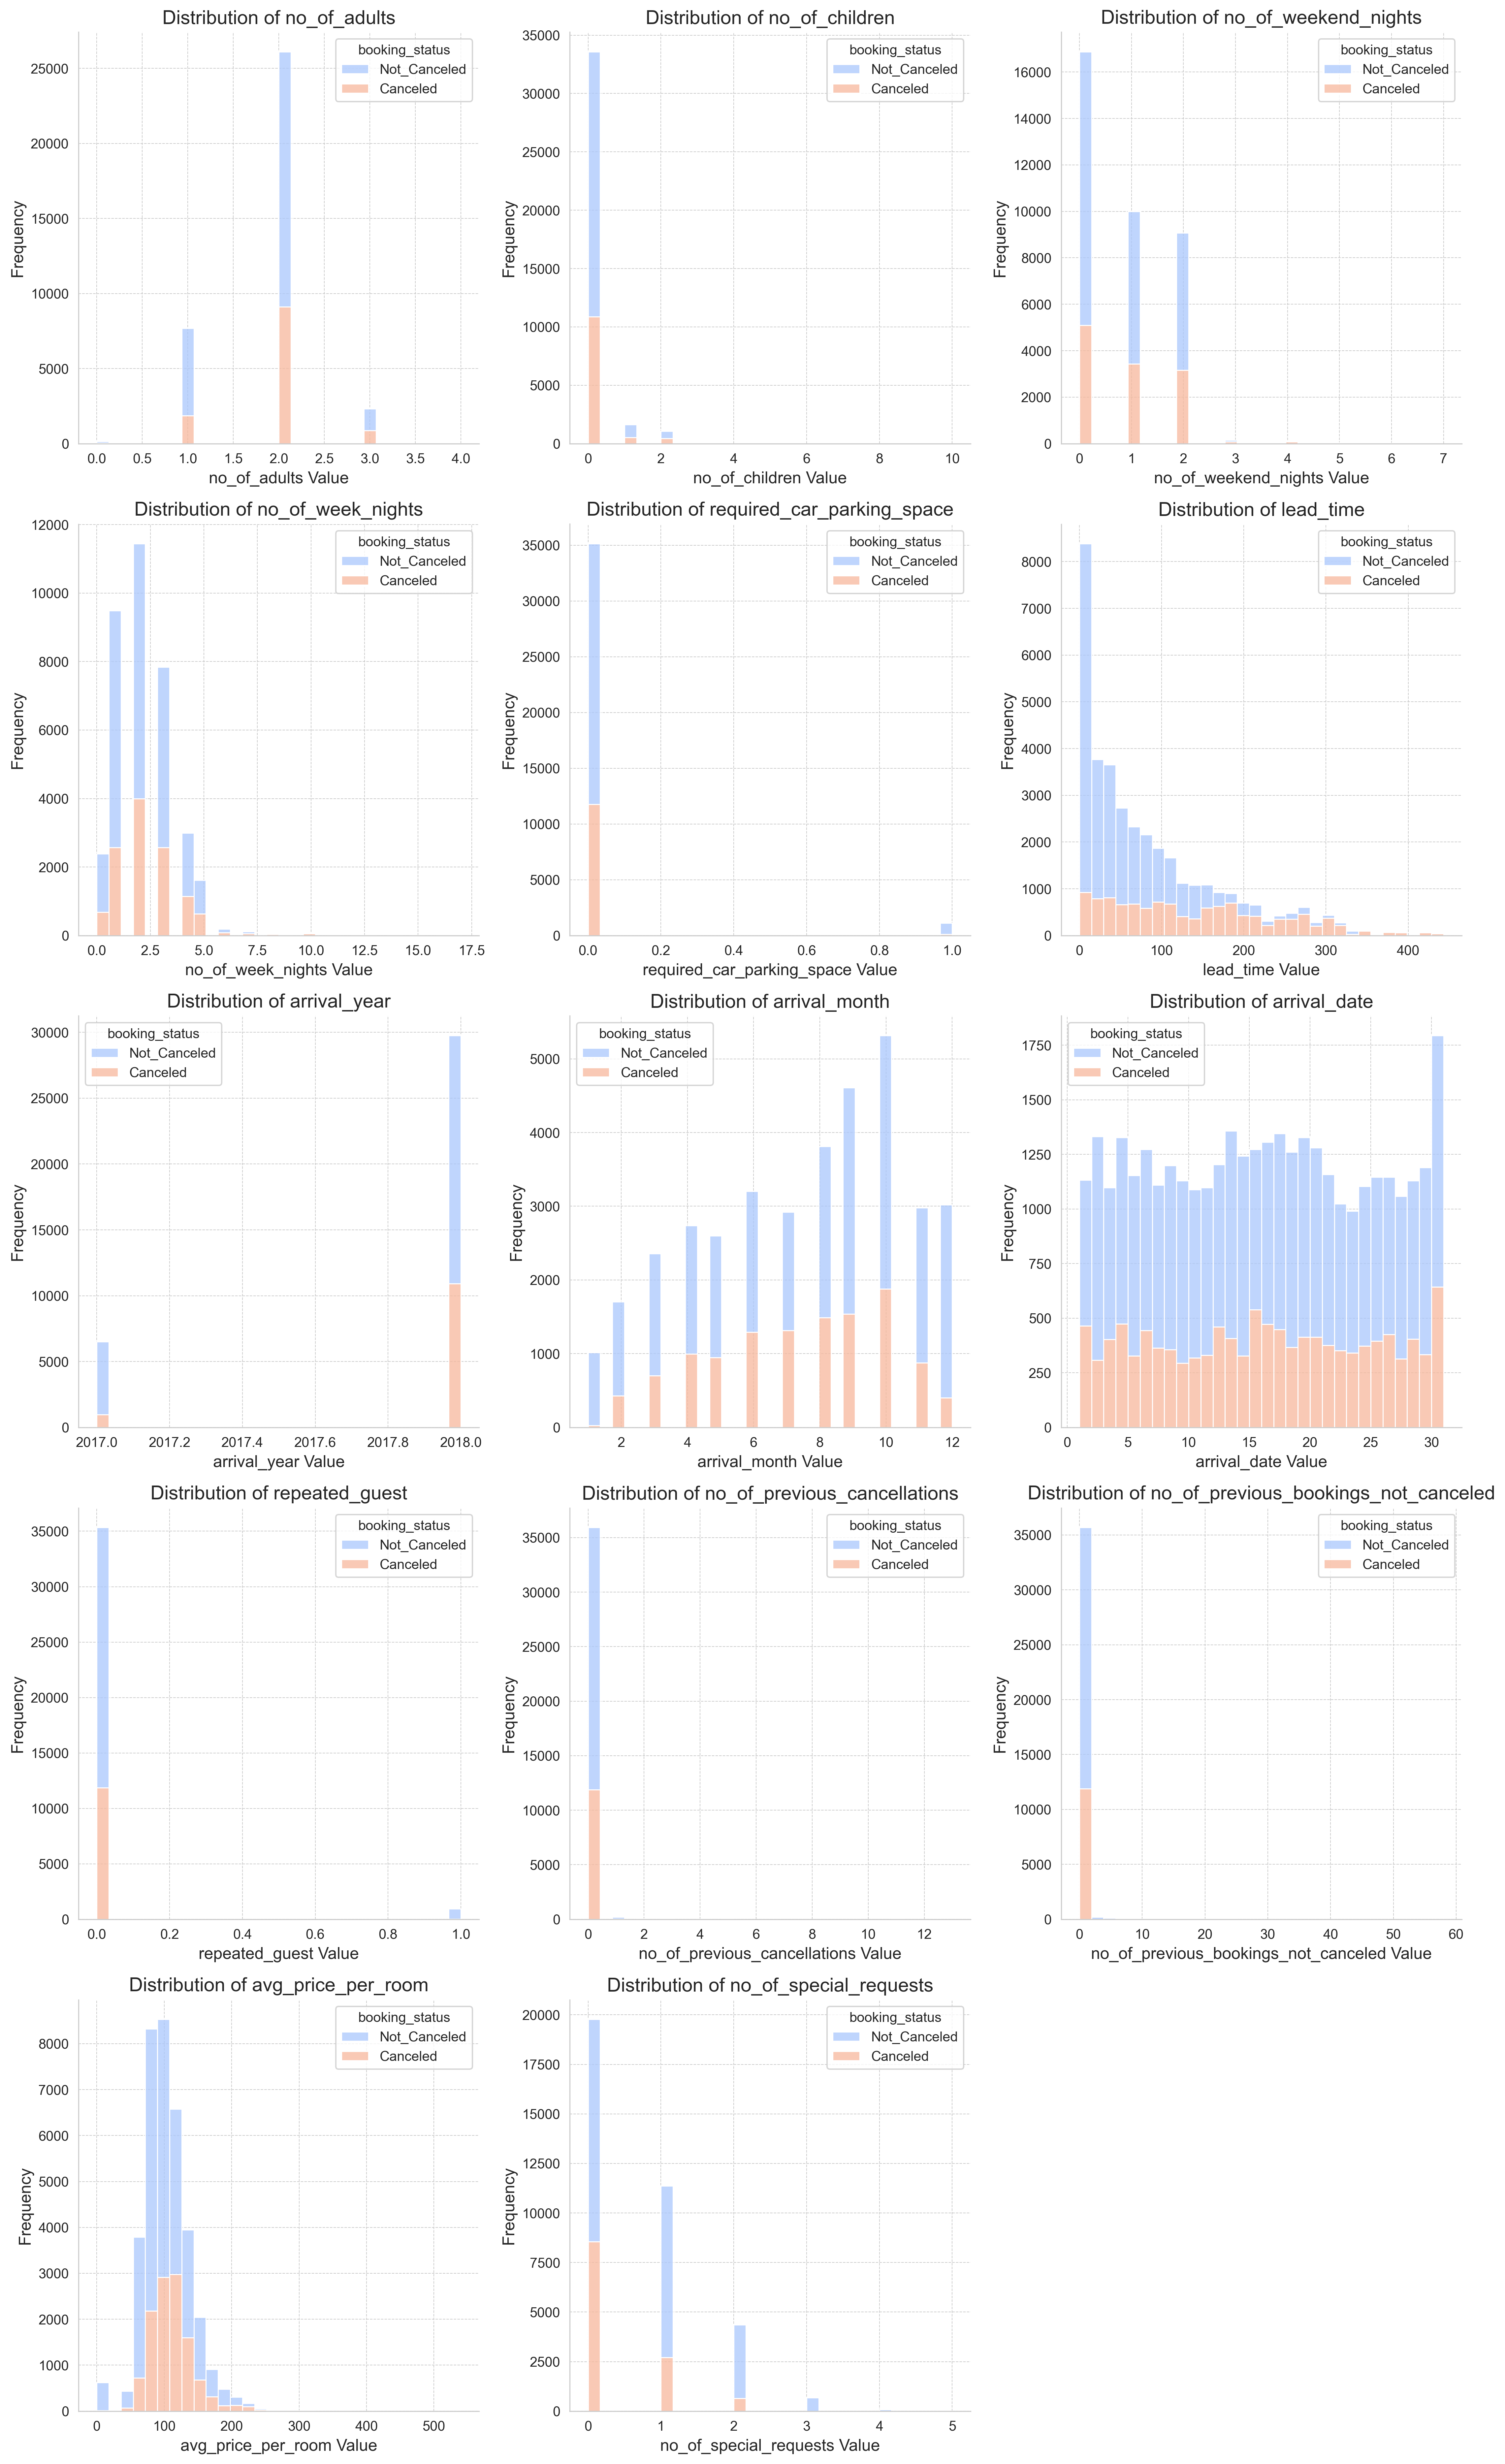

In [11]:
# Построение гистограмм для числовых признаков с учетом отмены бронирования
L = len(numerical_cols)

# Улучшение визуализации
ncol = 3
nrow = int(np.ceil(L / ncol))

fig, axes = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
fig.subplots_adjust(top=0.92)

axes = axes.flatten()

# Построение графиков
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue="booking_status", multiple="stack", ax=axes[i], bins=30, palette="coolwarm")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(f'{col} Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    sns.despine(ax=axes[i])


# Отключение доп.заголовков
for j in range(L, nrow * ncol):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Чаще всего отменяют бронь (booking_status=1):

*   Пары без детей
*   Гости, которые заказывают более дорогие номера
*   Гости без спец.требований
*   Гости, кто бронирует отели за полгода до визита и более
*   Гости, кто бронирует отели в теплое время года (хотя это может быть связано с сезонностью)
*   Гости, которые ранее не пользовались услугами бронирования
---
Ключевыми признаками отмены можно считать: срок предварительного бронирования, высокая средняя стоимость номера и отсутствие спц.требований

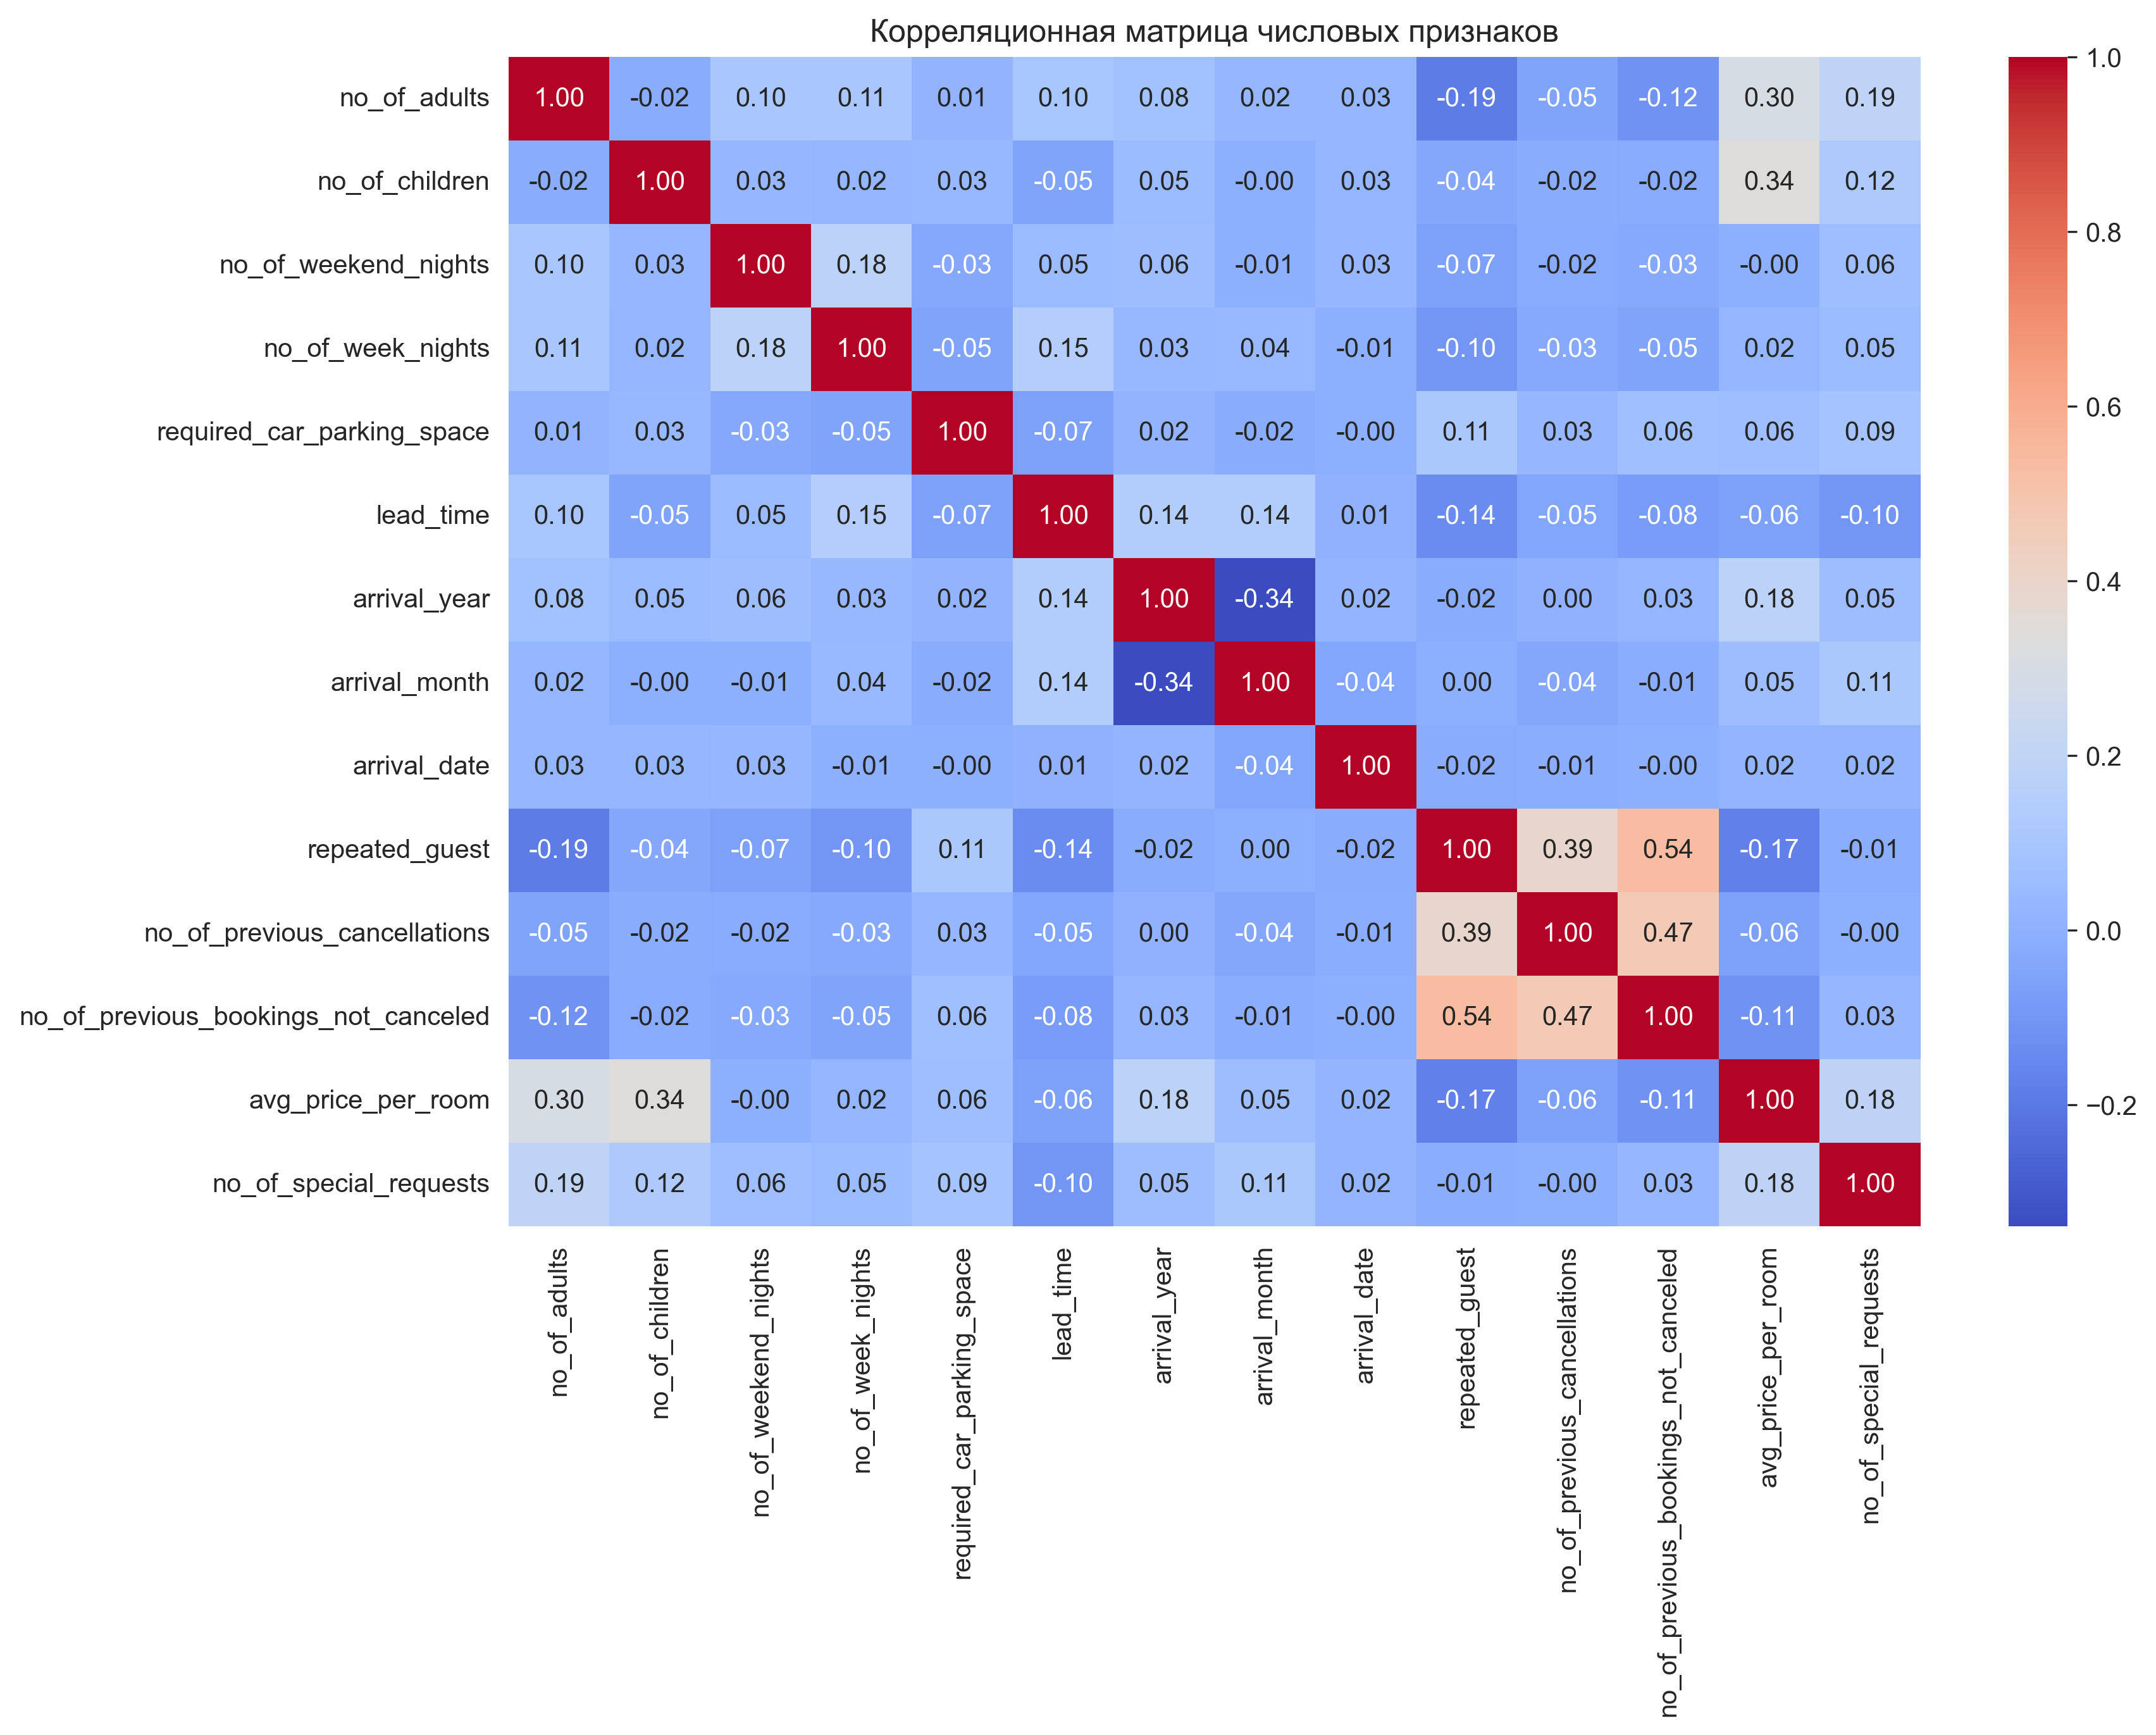

In [12]:
# Корреляционная матрица
corr_matrix = df[numerical_cols].corr()

# Тепловая карта
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()


### Визуализация категориальных признаков

In [13]:
# Список категориальных столбцов
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Исключение столбцов 'Booking_ID' и 'booking_status' из списка категориальных признаков
categorical_cols.remove('Booking_ID')
categorical_cols.remove('booking_status')

print("Категориальные признаки для визуализации:", categorical_cols)


Категориальные признаки для визуализации: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [24]:
# Построение countplot для категориальных признаков с прогресс-баром
for col in tqdm(categorical_cols):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Распределение {col}")
    plt.xticks(rotation=45)
    plt.show()
    plt.close()


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Наиболее популярными признаками бронирования можно считать заказ:
*   Комнат типа #1
*   Завтрак типа #1
*   Онлайн заказ бронирования



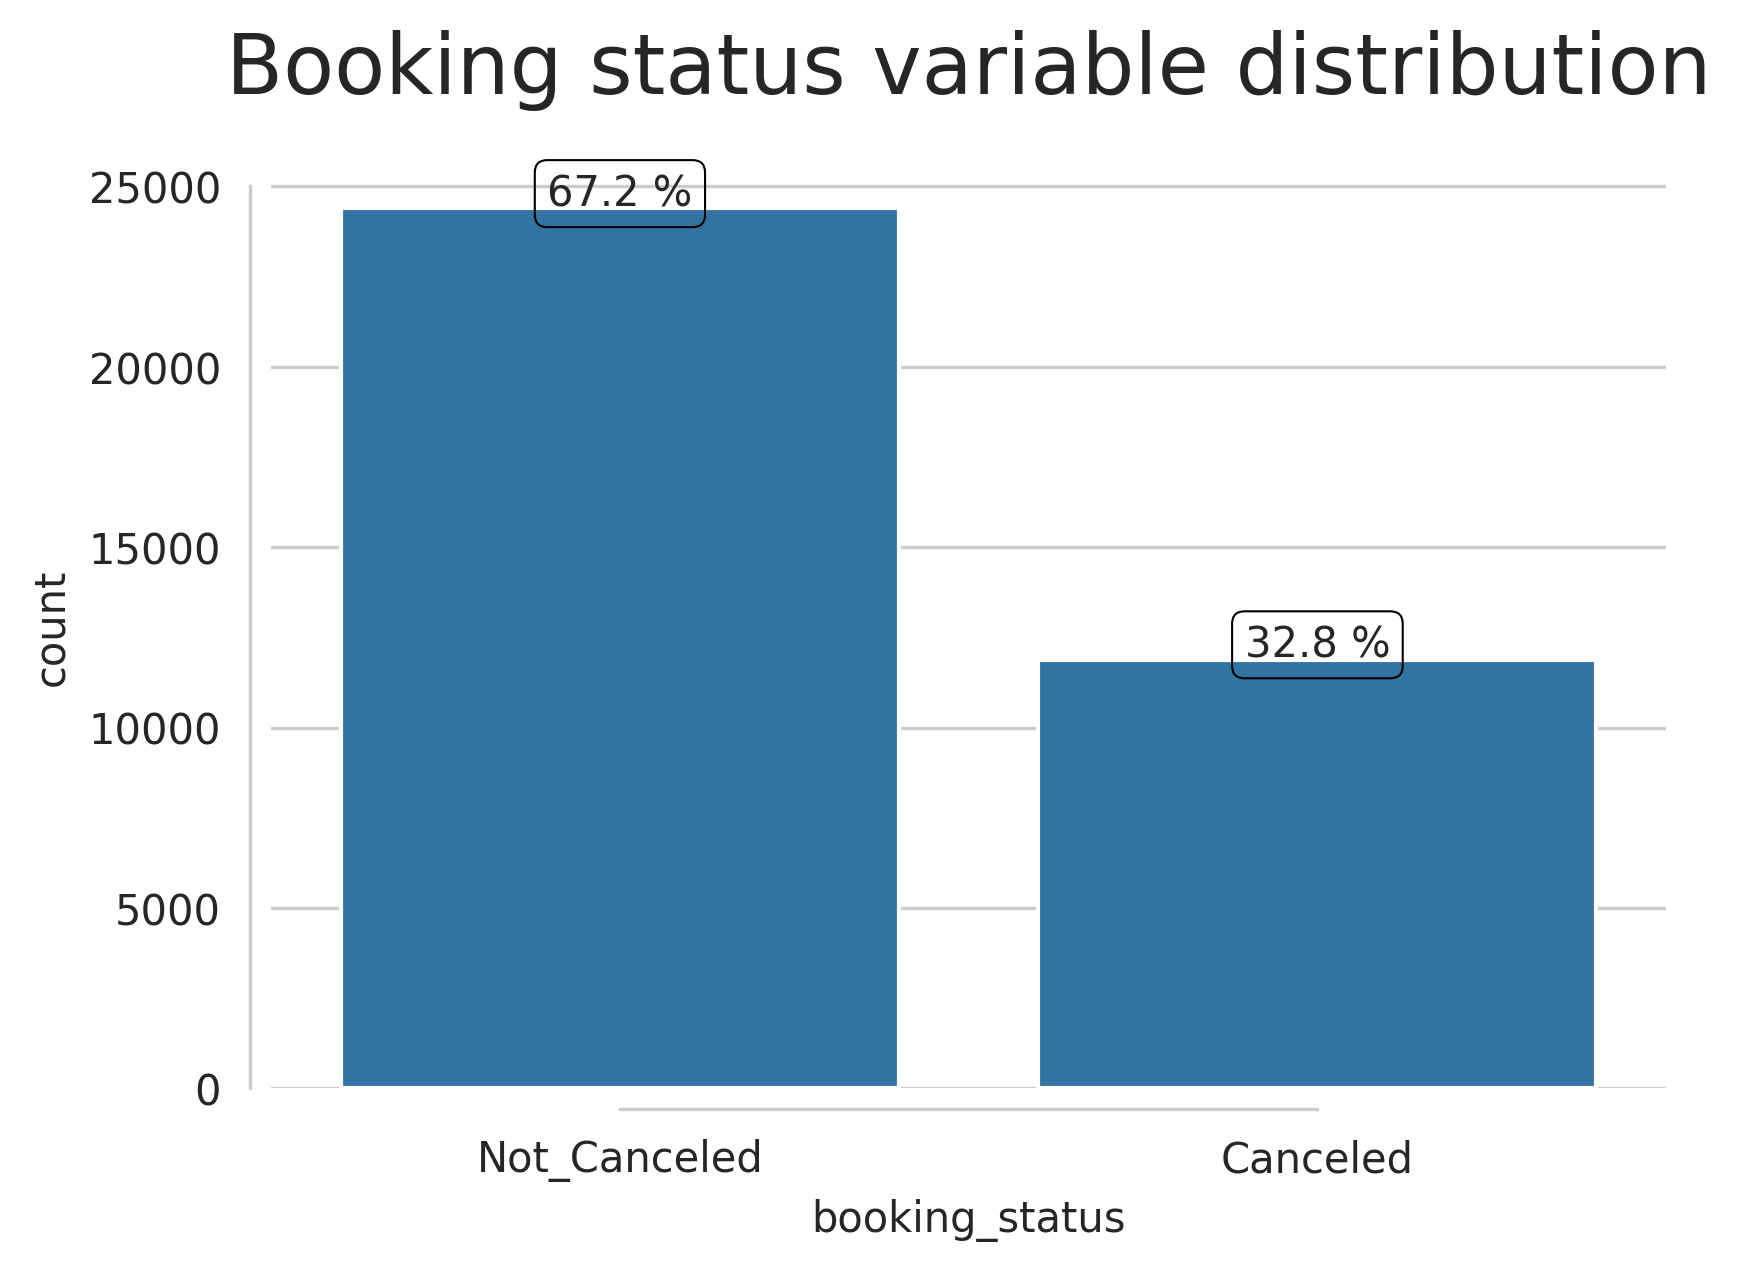

In [ ]:
# Построение графика для booking_status
plt.figure(figsize=(6, 4))
ax=sns.countplot(x=df['booking_status'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('Booking status variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)


Достаточно большой % отмен (booking_status=1), но дикого дисбаланса классов нет

### Подготовка данных и разделение на выборки

Разделим датасет на тренировочную и тестовую выборки с параметрами random_seed=420 и test_size=0.2

Производим обучение модели классификации, используя модель CatBoostClassifier из библиотеки catboost.

Задача классификации: определить, отменил ли клиент бронь (за это отвечает признак booking_status)

In [ ]:
# Кодирование целевой переменной
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [ ]:
# Удаление уникальных столбцов
df_model = df.drop(columns=['Booking_ID'])

In [ ]:
# Определение признаков и целевой переменной
X = df_model.drop('booking_status', axis=1)
y = df_model['booking_status']

# Определение индексов категориальных признаков для CatBoost
categorical_features_indices = np.where(X.dtypes == 'object')[0]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=420
)


### Обучение модели

In [ ]:
# Инициализация CatBoostClassifier
model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.2,
    depth=6,
    verbose = 50,
    use_best_model=True,
)

# Обучение модели
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=categorical_features_indices,
    early_stopping_rounds=100
)


0:	learn: 0.5708673	test: 0.5737005	best: 0.5737005 (0)	total: 101ms	remaining: 3m 21s
50:	learn: 0.2930441	test: 0.3027806	best: 0.3027806 (50)	total: 2.09s	remaining: 1m 19s
100:	learn: 0.2573232	test: 0.2781175	best: 0.2781175 (100)	total: 3.99s	remaining: 1m 15s
150:	learn: 0.2411111	test: 0.2708598	best: 0.2708431 (149)	total: 5.89s	remaining: 1m 12s
200:	learn: 0.2262225	test: 0.2651974	best: 0.2651974 (200)	total: 7.82s	remaining: 1m 9s
250:	learn: 0.2133251	test: 0.2605622	best: 0.2605622 (250)	total: 10.5s	remaining: 1m 12s
300:	learn: 0.2040457	test: 0.2569263	best: 0.2569263 (300)	total: 13.8s	remaining: 1m 18s
350:	learn: 0.1949606	test: 0.2543971	best: 0.2543971 (350)	total: 15.7s	remaining: 1m 13s
400:	learn: 0.1886490	test: 0.2529118	best: 0.2529118 (400)	total: 17.6s	remaining: 1m 10s
450:	learn: 0.1818875	test: 0.2519772	best: 0.2519772 (450)	total: 19.5s	remaining: 1m 7s
500:	learn: 0.1761337	test: 0.2513244	best: 0.2511608 (492)	total: 21.4s	remaining: 1m 4s
550:	lea

### Оценка модели

In [ ]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [ ]:
# подбираем трешхолд для повышения точности
from tqdm import tqdm
best_acc, best_trsh = 0, -1
sample_for_acc = np.linspace(0, 1, num=100, endpoint=False)
for isample in tqdm(sample_for_acc):
    y_test_pred = model.predict_proba(X_test)[:, 1] > isample
    accuracy = accuracy_score(y_test, y_test_pred)
    if accuracy > best_acc:
        best_acc = accuracy
        best_trsh = isample
y_test_pred = model.predict_proba(X_test)[:, 1] > best_trsh
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.5f} , {best_trsh}')

100%|██████████| 100/100 [00:03<00:00, 32.52it/s]

Accuracy: 0.89731 , 0.56


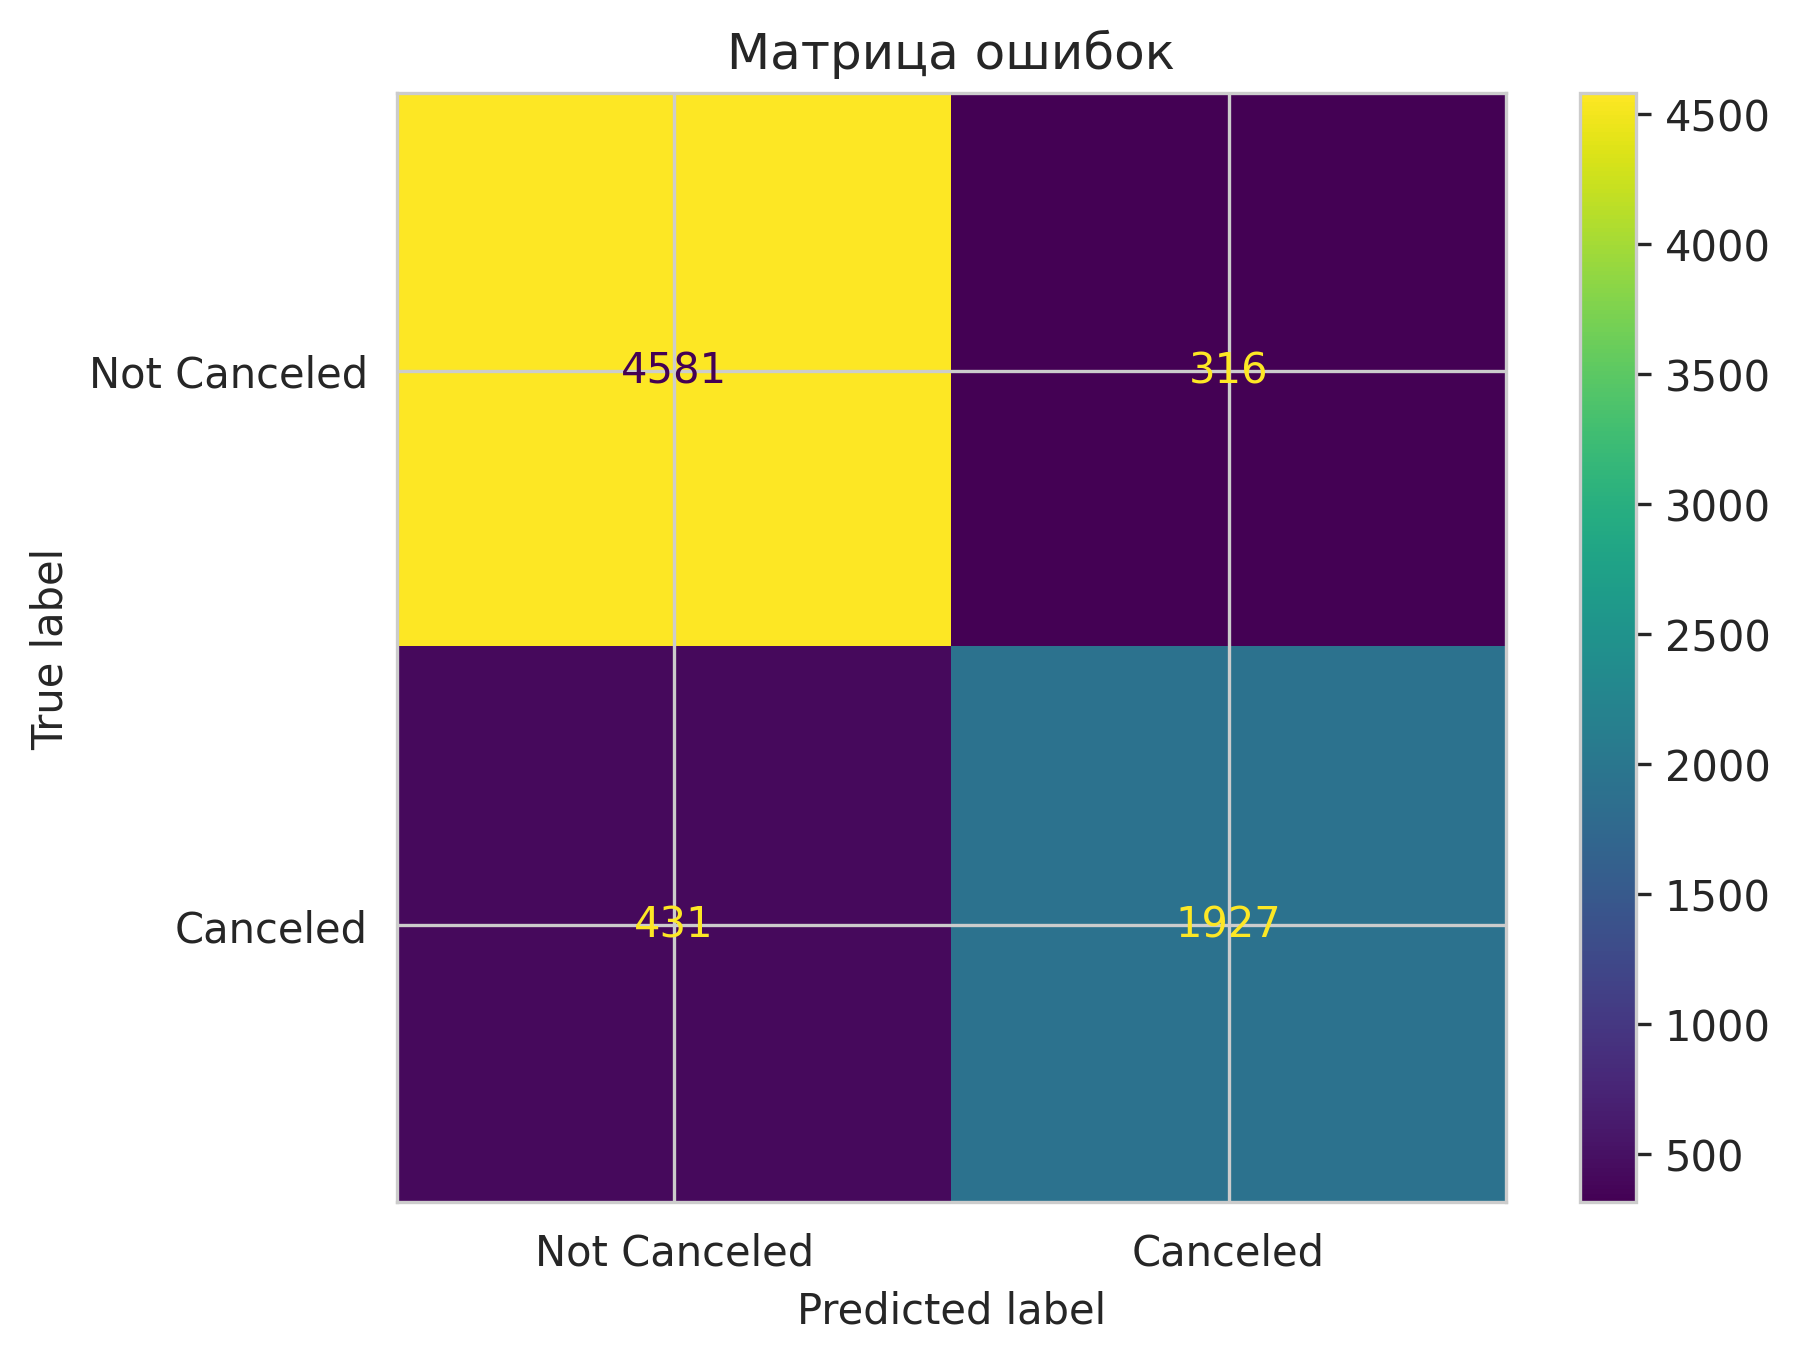

In [ ]:
# Вывод матрицы ошибок
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Canceled', 'Canceled'])
plt.title("Матрица ошибок")
plt.show()


Выводы:
Точность модели получилась 0.89731
---
Модель можно использовать для работы с метриками оттока и удержания клиентов.
Если мы видим потенциальные варианты отмены бронирования, можно проработать ряд гипотез по удержанию (от регулярных напоминаний, доработки системы лояльности до изменений условий бронирования)

Также снижение объема отказов от бронирования повлияет и на ключевые метрики бизнеса, такие как выручка.

Модель также может помочь бизнесу спрогнозировать степень загруженности отеля (или доступных номеров) и как следствие опитимизировать затраты ресурсов, нагрузку на персонал и прогнозировать спрос.






### На основе нашей модели можно построить следующие бизнесовые метрики:
---

1.   Метрика "Доля дополнительного дохода от эффектиной работы с оттоком (предотвращение отмен брони)"

Метрика показывает объем потенциального дохода от бронирований, которые в модели предположительно подходили под отмену, но с помощью дополнительного внимания со стороны бизнеса были реализованы.

Формула расчета:
Метрика рассчитывается как отношение общего дохода от бронирований (отмененных по предсказанию, но реализованных по факту) к общему доходу от всех отменяемых бронирований.

Доля дохода от предотвращенных отмен = (Σ Доход от неотмененных бронирований, предсказанных как отменяемые) / (Σ Потенциальный доход от всех бронирований, предсказанных как отменяемые) * 100%




2.   Метрика "Загрузка отеля (в процентах):  Для прогнозирования и оптимизации использования ресурсов"

Загрузка отеля:  Модель позволяет точнее прогнозировать загрузку отеля в разные периоды, что помогает оптимизировать количество персонала в определенный период, рассчитывать закупку ресурсов для обслуживания.  Это можно отслеживать, например, по среднему проценту заполненности номеров в различные периоды года или недели.
Распределение персонала:  Прогнозируя загрузку, можно лучше распределить персонал, избежать перегрузки в пиковые часы и оптимизировать рабочее время сотрудников.

Формула расчета:
Метрика рассчитывается как отношение общего количества номеров, которые по прогнозу не будут отменены в периоде, к общему количеству всех номеров.

Загрузка отеля = (Σ количество неотмененных бронирований номеров в период) / (Σ всех номеров в отеле) * 100%



3. Коэффициент удержания клиентов: Отслеживание изменения числа отмен до и после внедрения модели может дать представление о её эффективности.
Для оценки эффективности модели можно использовать метрику "Коэффициент удержания клиентов" (Retention Rate), которая показывает, какой процент клиентов завершил свои бронирования.

Формула подсчета:
$ \text{Коэффициент удержания клиентов (K)} = \frac{\text{Количество завершенных бронирований}}{\text{Общее количество сделанных бронирований}} \times 100% $

Пример:
Если за месяц было 1000 бронирований, и 800 из них были завершены, то:
$ K = \frac{800}{1000} \times 100% = 80% $


Эта метрика поможет бизнесу отслеживать изменения в поведении клиентов и эффективность предпринятых мер по снижению отмен.
